<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">KANs for Breast Cancer Prediction (Classification)
</h1>  
     
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>Overview</font></h3>
    
* In this notebook I implement a Kolmogorov-Arnold Network (KAN) for Breast Cancer Prediction and compare it against a neural network of a similar architecture.
* The dataset is from Kaggle, available at this https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
    



# Import Packages


In [1]:
import torch
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

## Loading the Dataset

In [2]:
data = pd.read_csv("data/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<Axes: >

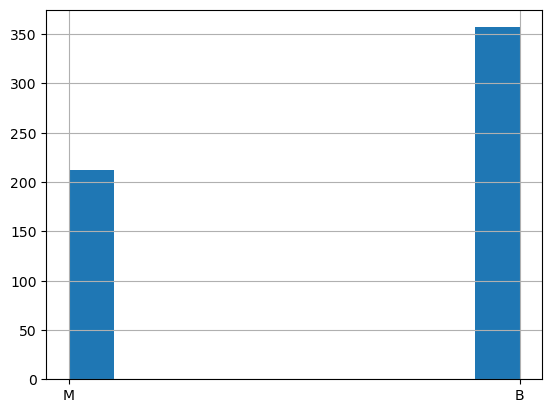

In [4]:
data.diagnosis.hist()

In [5]:
# Split dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)

## Preprocessing

In [7]:
def Preprocessing(data):
    #Remove id column
    data = data.drop(columns=['id', 'Unnamed: 32'])
    
    #StandardScaler
    sacale = StandardScaler()
    target = data['diagnosis'].map(lambda x:x=='M').astype(int)
    data = sacale.fit_transform(data.drop(columns=['diagnosis']))
    # data = data.drop(columns=['diagnosis'])
    return data, target.tolist()

In [8]:
train_x, train_y = Preprocessing(train_data)
test_x, test_y = Preprocessing(test_data)

## A summary of various machine learning methods and their accuracy

In [18]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

lcf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
train, test = lcf.fit(train_x, test_x, train_y, test_y)

100%|██████████| 29/29 [00:00<00:00, 35.20it/s]

[LightGBM] [Info] Number of positive: 170, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [19]:
train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.98,0.98,0.98,0.98,0.02
Perceptron,0.97,0.97,0.97,0.97,0.01
LogisticRegression,0.97,0.97,0.97,0.97,0.02
SVC,0.96,0.96,0.96,0.96,0.01
PassiveAggressiveClassifier,0.96,0.96,0.96,0.96,0.00
LinearSVC,0.96,0.96,0.96,0.96,0.00
XGBClassifier,0.96,0.95,0.95,0.96,0.04
GaussianNB,0.95,0.94,0.94,0.95,0.00
RidgeClassifierCV,0.96,0.94,0.94,0.96,0.00


In [20]:
test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.98,0.98,0.98,0.98,0.02
Perceptron,0.97,0.97,0.97,0.97,0.01
LogisticRegression,0.97,0.97,0.97,0.97,0.02
SVC,0.96,0.96,0.96,0.96,0.01
PassiveAggressiveClassifier,0.96,0.96,0.96,0.96,0.00
LinearSVC,0.96,0.96,0.96,0.96,0.00
XGBClassifier,0.96,0.95,0.95,0.96,0.04
GaussianNB,0.95,0.94,0.94,0.95,0.00
RidgeClassifierCV,0.96,0.94,0.94,0.96,0.00


## Prepare data for KAN

In [28]:
dataset = {}
dataset['train_input'] = torch.tensor(train_x, dtype=torch.float32)
dataset['test_input'] = torch.tensor(test_x, dtype=torch.float32)
dataset['train_label'] = torch.tensor(train_y, dtype=torch.long)
dataset['test_label'] = torch.tensor(test_y, dtype=torch.long)

In [29]:
dataset['train_input']

tensor([[ 1.0450,  0.2971,  1.0104,  ...,  1.2184,  0.2981,  0.0838],
        [ 1.6814, -1.1410,  1.7034,  ...,  0.6972, -0.8860, -0.4123],
        [-1.4426, -1.1273, -1.4505,  ..., -1.5223,  0.1807, -0.3366],
        ...,
        [ 0.8264,  1.1754,  0.8663,  ...,  1.1064,  0.7285,  3.0228],
        [-0.0508,  0.4313, -0.1115,  ..., -0.5405, -1.1207, -0.4490],
        [-0.3275, -0.2126, -0.3990,  ..., -0.9811, -1.5273, -1.3199]])

In [30]:
print("Train data shape: {}".format(dataset['train_input'].shape))
print("Train target shape: {}".format(dataset['train_label'].shape))
print("Test data shape: {}".format(dataset['test_input'].shape))
print("Test target shape: {}".format(dataset['test_label'].shape))
print("====================================")

Train data shape: torch.Size([455, 30])
Train target shape: torch.Size([455])
Test data shape: torch.Size([114, 30])
Test target shape: torch.Size([114])


## Creating and Training the KAN on a subset of features

checkpoint directory created: ./model
saving model version 0.0


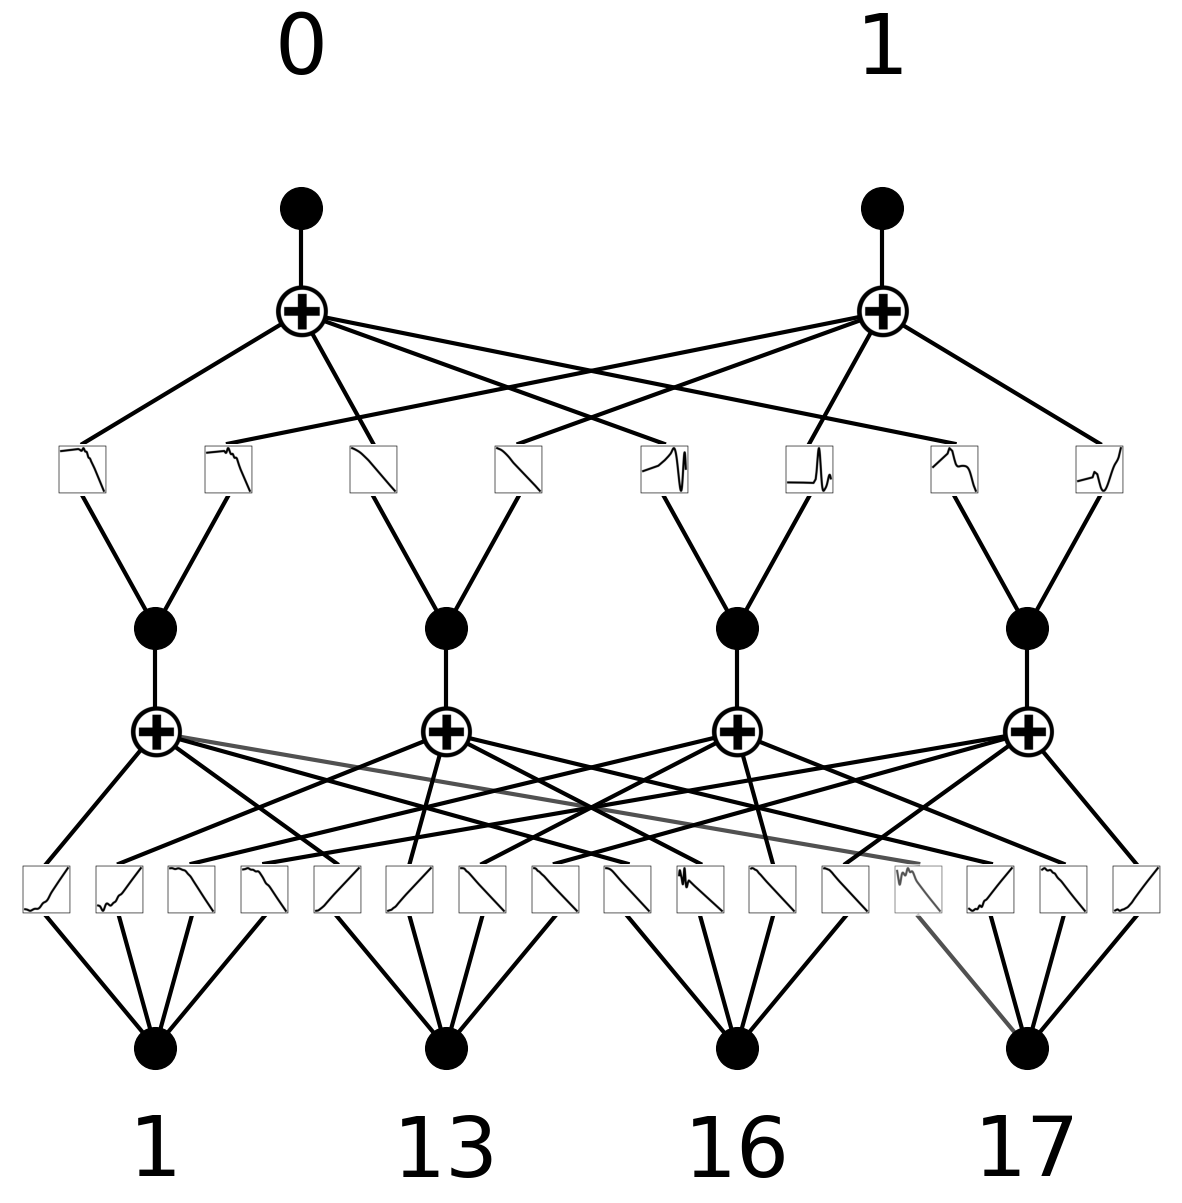

In [98]:
image_folder = 'video_img'

from kan import KAN
small_model = KAN(width=[4, 4, 2], grid=5, k=3, seed=0)

#Prepare dataset
small_dataset = dataset.copy()
small_dataset['train_input'] = small_dataset['train_input'][:,[1, 13, 16, 17]]
small_dataset['test_input'] = small_dataset['test_input'][:,[1, 13, 16, 17]]

#column_names
column_names = list(data.columns[:-1])
column_names.remove('id')
column_names.remove('diagnosis')
column_names = np.array(column_names)

#plot model
small_model(small_dataset['train_input'])
small_model.plot(beta=100, scale=1.5, in_vars=[1, 13, 16, 17], out_vars=[0, 1])

In [101]:
def train_acc():
    return torch.mean((torch.argmax(small_model(small_dataset['train_input']), dim=1) == small_dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(small_model(small_dataset['test_input']), dim=1) == small_dataset['test_label']).float())

In [102]:
results = small_model.fit(small_dataset, 
                    opt="Adam",
                    metrics=(train_acc, test_acc),
                    loss_fn=torch.nn.CrossEntropyLoss(),
                    steps=200,
                    save_fig=False, 
                    img_folder=image_folder)

| train_loss: 4.23e-01 | test_loss: 6.50e-01 | reg: 1.29e+02 | : 100%|█| 200/200 [00:02<00:00, 68.92

saving model version 0.1


Text(0, 0.5, 'Loss')

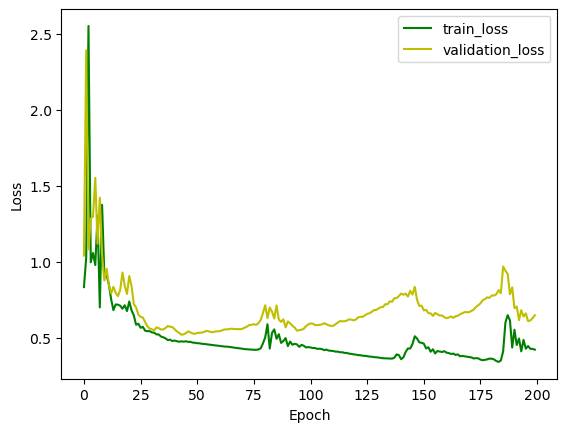

In [103]:
plt.plot(results['train_loss'], 'g', label='train_loss') 
plt.plot(results['test_loss'], 'y', label='validation_loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [104]:
results['train_acc'][-1], results['test_acc'][-1]

(0.9164835214614868, 0.8859649300575256)

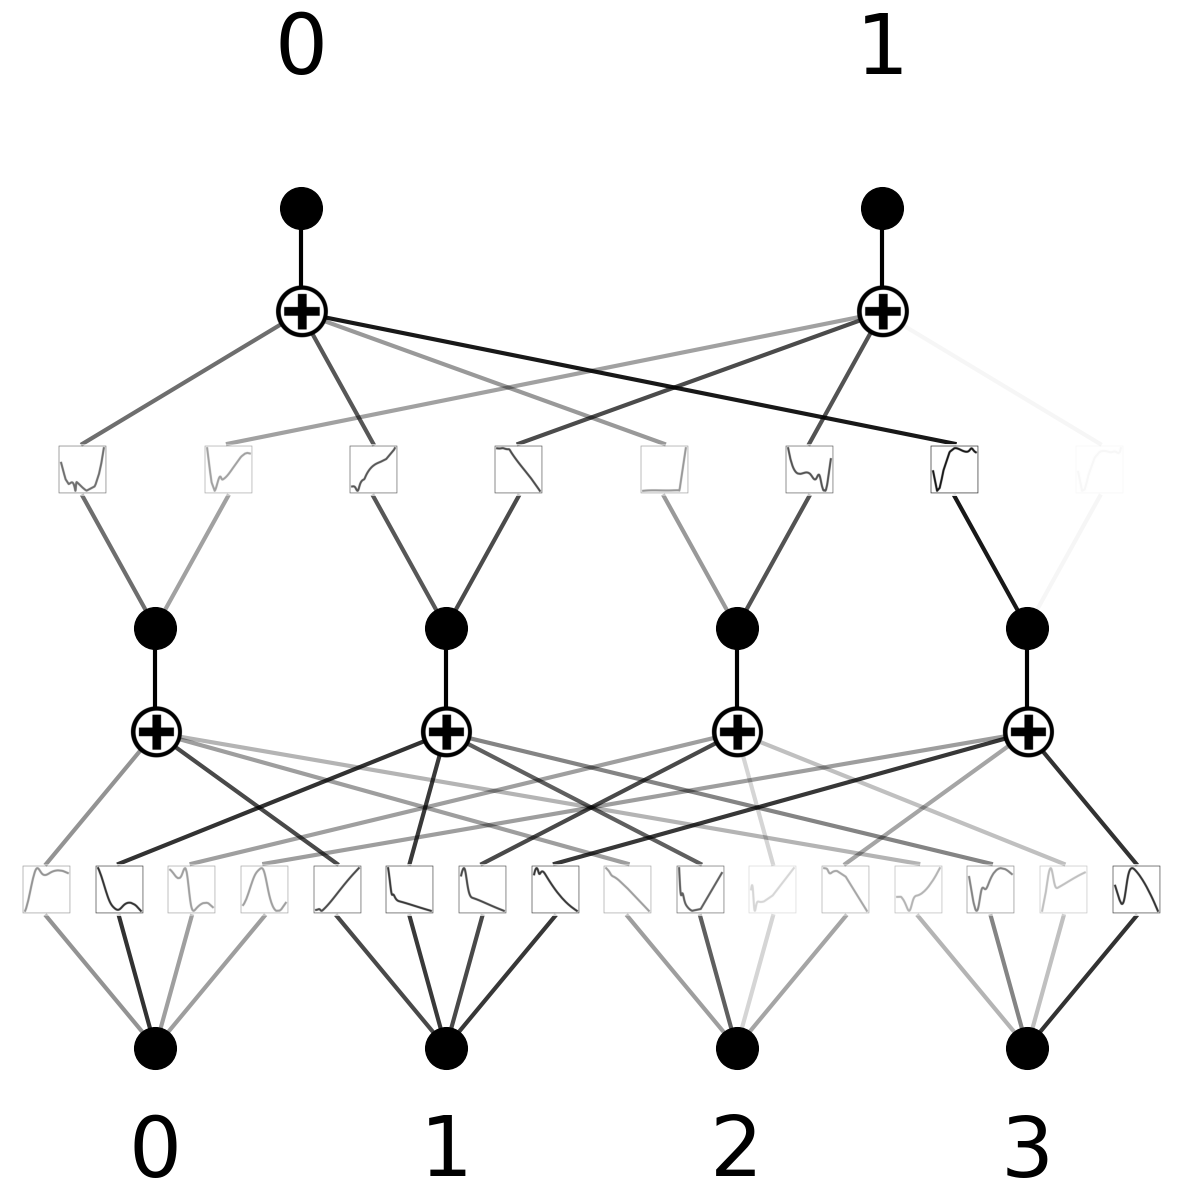

In [79]:
small_model.plot(scale=1.5, in_vars=list(range(4)), out_vars=[0, 1])

In [80]:
import os
import moviepy.video.io.ImageSequenceClip

video_name='video'
fps=4

fps = fps
files = os.listdir(image_folder)
train_index = []
for file in files:
    if file[0].isdigit() and file.endswith('.jpg'):
        train_index.append(int(file[:-4]))

train_index = np.sort(train_index)

image_files = [image_folder+'/'+str(train_index[index])+'.jpg' for index in train_index]

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(video_name+'.mp4')

Moviepy - Building video video.mp4.
Moviepy - Writing video video.mp4



Moviepy - Done !
Moviepy - video ready video.mp4


<video alt="test" controls>
        <source src="video.mp4" type="video/mp4">
    </video>

## Creating and Training the KAN on all features

In [105]:
model = KAN(width=[30, 2], grid=5, k=3, seed=0)

checkpoint directory created: ./model
saving model version 0.0


In [106]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [107]:
%%time

results = model.fit(dataset, 
                    opt="Adam",
                    metrics=(train_acc, test_acc),
                    loss_fn=torch.nn.CrossEntropyLoss(),
                    steps=400)

description:   0%|                                                          | 0/400 [00:00<?, ?it/s]

| train_loss: 2.00e-04 | test_loss: 1.31e+00 | reg: 5.07e+02 | : 100%|█| 400/400 [00:06<00:00, 63.42

saving model version 0.1
CPU times: total: 297 ms
Wall time: 6.31 s


In [108]:
print('Training Accuracy :', results['train_acc'][-1])
print('Test Accuracy :', results['test_acc'][-1])

Training Accuracy : 1.0
Test Accuracy : 0.9473684430122375


In [109]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print('Total trainable parameters :', params)

Total trainable parameters : 840


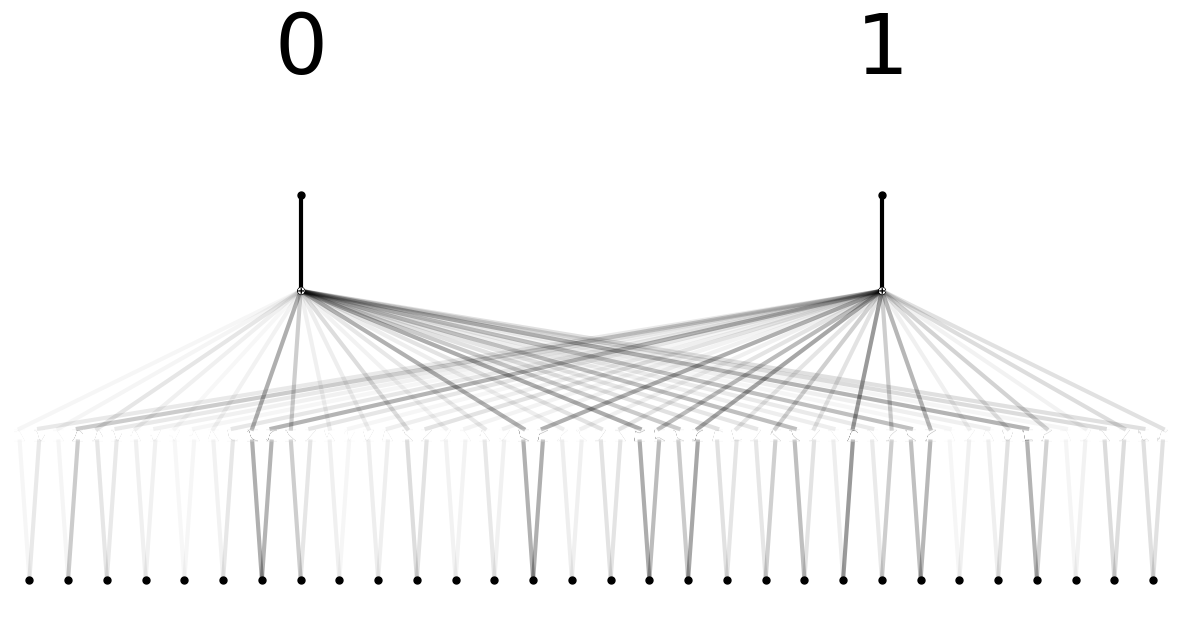

In [110]:
model.plot(scale=1.5, out_vars=[0,1])

saving model version 0.2


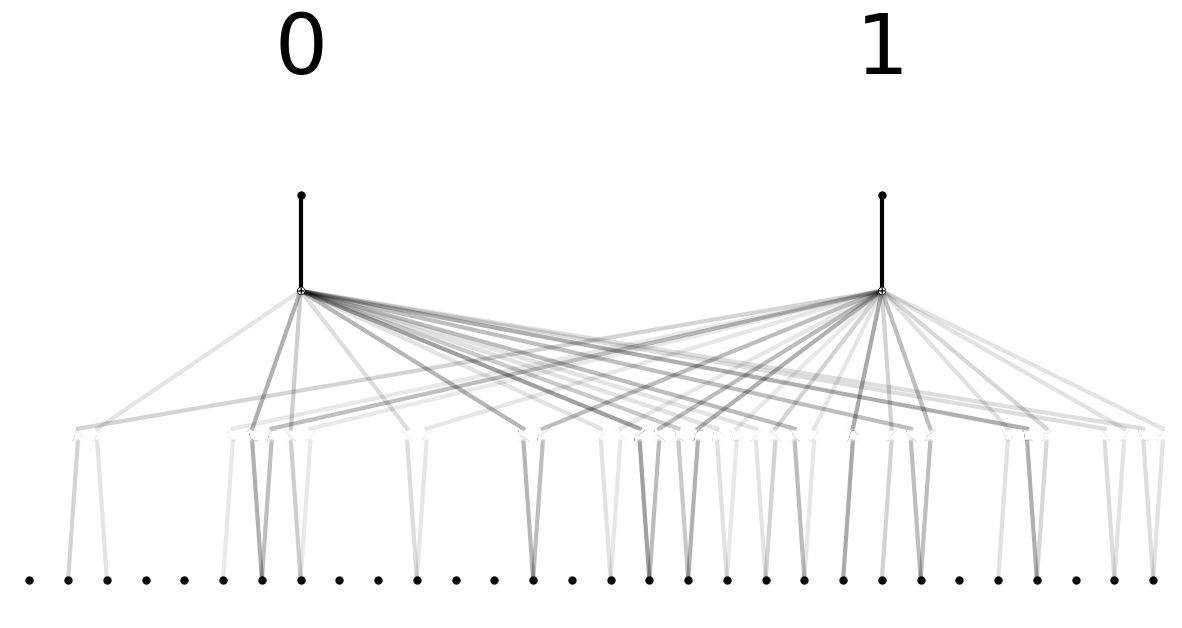

In [111]:
model_pruned = model.prune()
model_pruned(dataset['train_input'])
model_pruned.plot(scale=1.5, out_vars=[0,1])

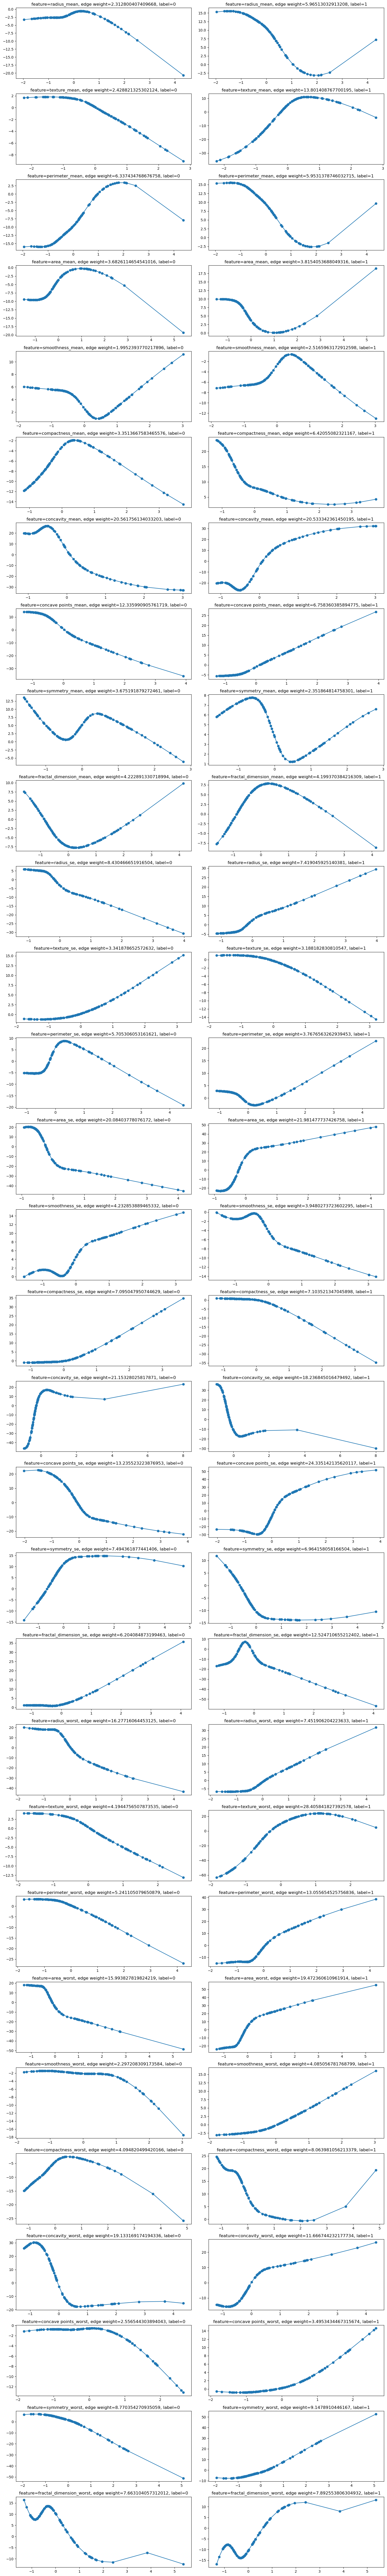

In [112]:
fig, ax = plt.subplots(30, 2, figsize=(15, 100))
l=0

# Iterate over all combinations of i, j
for i in range(30):
    for j in range(2):
        # Get the appropriate subplot
        inputs = model.spline_preacts[l][:, j, i]
        outputs = model.spline_postacts[l][:, j, i]
        rank = np.argsort(inputs)
        inputs = inputs[rank]
        outputs = outputs[rank]

        # Plot on the appropriate subplot
        ax[i, j].plot(inputs, outputs, marker="o")
        ax[i, j].set_title(f'feature={column_names[i]}, edge weight={model.edge_actscale[l][j,i]}, label={j}')

# Adjust layout
plt.tight_layout()
plt.show()

In [113]:
# fine tune
results_1 = model_pruned.fit(dataset, opt="Adam", metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss(), steps=100)
results_1['train_acc'][-1], results_1['test_acc'][-1]

| train_loss: 6.48e-04 | test_loss: 2.25e+00 | reg: 8.64e+02 | : 100%|█| 100/100 [00:02<00:00, 36.05


saving model version 0.3


(1.0, 0.9473684430122375)

In [114]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','abs']
model_pruned.auto_symbolic(lib=lib)

fixing (0,0,0) with 0
fixing (0,0,1) with 0
fixing (0,1,0) with 0
fixing (0,1,1) with x^2, r2=0.9954193234443665, c=2
fixing (0,2,0) with x^2, r2=0.9961702227592468, c=2
fixing (0,2,1) with 0
fixing (0,3,0) with 0
fixing (0,3,1) with 0
fixing (0,4,0) with 0
fixing (0,4,1) with 0
fixing (0,5,0) with 0
fixing (0,5,1) with x, r2=0.7616474628448486, c=1
fixing (0,6,0) with x, r2=0.8329737782478333, c=1
fixing (0,6,1) with x, r2=0.8307314515113831, c=1
fixing (0,7,0) with x, r2=0.961471438407898, c=1
fixing (0,7,1) with x, r2=0.9830764532089233, c=1
fixing (0,8,0) with 0
fixing (0,8,1) with 0
fixing (0,9,0) with 0
fixing (0,9,1) with 0
fixing (0,10,0) with x, r2=0.972326934337616, c=1
fixing (0,10,1) with x, r2=0.9750545024871826, c=1
fixing (0,11,0) with 0
fixing (0,11,1) with 0
fixing (0,12,0) with 0
fixing (0,12,1) with 0
fixing (0,13,0) with x, r2=0.7850766777992249, c=1
fixing (0,13,1) with x, r2=0.7793189883232117, c=1
fixing (0,14,0) with 0
fixing (0,14,1) with 0
fixing (0,15,0) with

In [115]:
formula1, formula2 = model_pruned.symbolic_formula()[0]

In [116]:
formula1

-42.6476040754915*x_11 - 32.7162211821296*x_14 + 15.7408119871448*x_16 + 20.0541112511326*x_17 - 19.514169216156*x_18 + 22.4226917112514*x_19 + 20.9049446343755*x_20 - 32.5432237289235*x_21 - 28.3303766046572*x_24 - 34.6390116844566*x_27 - 26.0948092713377*x_29 - 19.3016472462482*x_30 - 27.4415417886303*x_7 - 29.1515448216608*x_8 - 1.98374951699172*(-0.682513507505153*x_3 - 1)**2 + 10.8421398654054

In [117]:
from sympy import *

simplify(formula1)

-42.6476040754915*x_11 - 32.7162211821296*x_14 + 15.7408119871448*x_16 + 20.0541112511326*x_17 - 19.514169216156*x_18 + 22.4226917112514*x_19 + 20.9049446343755*x_20 - 32.5432237289235*x_21 - 28.3303766046572*x_24 - 34.6390116844566*x_27 - 26.0948092713377*x_29 - 19.3016472462482*x_30 - 27.4415417886303*x_7 - 29.1515448216608*x_8 - 1.98374951699172*(0.682513507505153*x_3 + 1)**2 + 10.8421398654054

# Implementation of a Neural Network for comparison

## Misc Functions



In [131]:
device = 'cpu'
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(30, 30)  # 4 inputs to 5 hidden nodes
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(30, 2)  # 5 hidden nodes to 3 outputs

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100):
    model.train()
    train_loss_list = []
    val_loss_list = []

    for epoch in range(num_epochs):
        # Training phase
        train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)  # Accumulate loss

        train_loss /= len(train_loader.dataset)  # Average training loss
        train_loss_list.append(train_loss)

        # Validation phase
        model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)  # Accumulate loss

        val_loss /= len(val_loader.dataset)  # Average validation loss
        val_loss_list.append(val_loss)
        model.train()  # Set model back to training mode

        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    return train_loss_list, val_loss_list


def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')

In [132]:
def load_dataset():
    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['train_input'], dataset['train_label']), batch_size=1000, shuffle=True)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['test_input'], dataset['test_label']), batch_size=1000, shuffle=False)

    return train_loader, test_loader

train_loader, test_loader = load_dataset()

## Train and Evaluate the NN

In [136]:
%%time

model = NeuralNetwork().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

train_loss_list, val_loss_list = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=1000)

Epoch 1/1000, Training Loss: 0.6226, Validation Loss: 0.6122
Epoch 2/1000, Training Loss: 0.6084, Validation Loss: 0.5997
Epoch 3/1000, Training Loss: 0.5945, Validation Loss: 0.5876
Epoch 4/1000, Training Loss: 0.5810, Validation Loss: 0.5756
Epoch 5/1000, Training Loss: 0.5678, Validation Loss: 0.5638
Epoch 6/1000, Training Loss: 0.5549, Validation Loss: 0.5522
Epoch 7/1000, Training Loss: 0.5423, Validation Loss: 0.5409
Epoch 8/1000, Training Loss: 0.5299, Validation Loss: 0.5297
Epoch 9/1000, Training Loss: 0.5176, Validation Loss: 0.5186
Epoch 10/1000, Training Loss: 0.5056, Validation Loss: 0.5076
Epoch 11/1000, Training Loss: 0.4938, Validation Loss: 0.4969
Epoch 12/1000, Training Loss: 0.4822, Validation Loss: 0.4863
Epoch 13/1000, Training Loss: 0.4708, Validation Loss: 0.4759
Epoch 14/1000, Training Loss: 0.4596, Validation Loss: 0.4656
Epoch 15/1000, Training Loss: 0.4485, Validation Loss: 0.4555
Epoch 16/1000, Training Loss: 0.4377, Validation Loss: 0.4456
Epoch 17/1000, Tr

Text(0, 0.5, 'Loss')

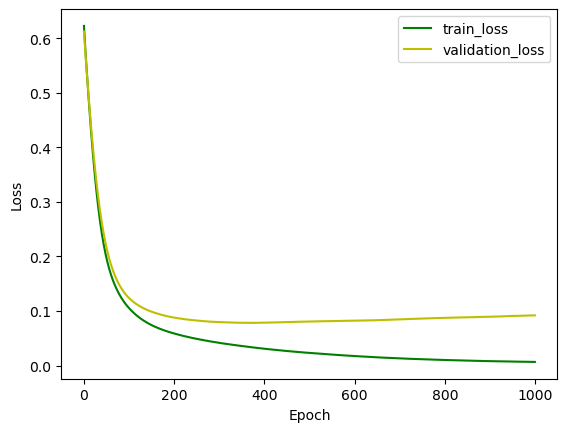

In [137]:
plt.plot(train_loss_list, 'g', label='train_loss') 
plt.plot(val_loss_list, 'y', label='validation_loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [138]:
test_model(model, test_loader)

Accuracy: 97.36842105263158%


In [139]:
test_model(model, train_loader)

Accuracy: 99.78021978021978%


In [140]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

992

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: green; font-size:100%; text-align:left">

<h3 align="center"><font color='white'>💡 Summary from above :</font></h3>

1. I trained a Kolmogorov-Arnold Network (KAN) on a few selected features to observe parameter updates during training.
1. I then trained a small KAN with one hidden layer on the full dataset, which demonstrated strong interpretability.
1. Finally, I trained a fully connected neural network with a similar parameter count, which showed slightly higher accuracy than the KAN and was about four times faster.
